In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')

In [88]:
#LOADING MAIN DATA

In [89]:
df = pd.read_csv("C:/Users/chand/loan_default project/data/application_train.csv").sample(n=10000, random_state=42)
print("Shape of data: ",df.shape)
df.head()

Shape of data:  (10000, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,...,0.0760,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
36463,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
249923,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,...,0.1332,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
158389,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,S

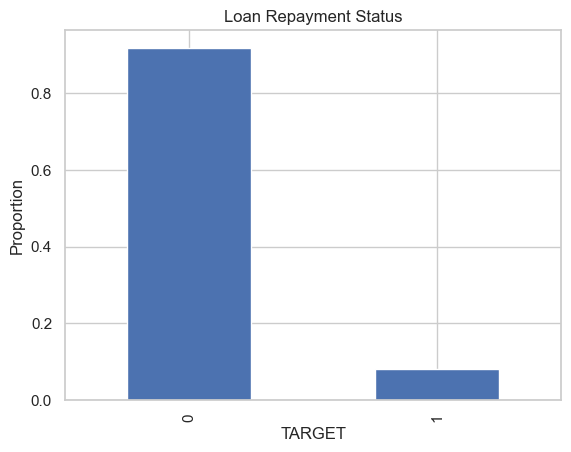

In [90]:
#TARGET VARIABLE
target_count=app_train['TARGET'].value_counts(normalize=True)
target_count.plot(kind='bar')
plt.title("Loan Repayment Status")
plt.ylabel("Proportion")
plt.show()

In [91]:
#MISSING VALUES
missing = df.isnull().mean()
missing[missing > 0]

AMT_ANNUITY                   0.0001
AMT_GOODS_PRICE               0.0012
NAME_TYPE_SUITE               0.0049
OWN_CAR_AGE                   0.6605
OCCUPATION_TYPE               0.3102
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     0.1296
AMT_REQ_CREDIT_BUREAU_WEEK    0.1296
AMT_REQ_CREDIT_BUREAU_MON     0.1296
AMT_REQ_CREDIT_BUREAU_QRT     0.1296
AMT_REQ_CREDIT_BUREAU_YEAR    0.1296
Length: 66, dtype: float64

In [92]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,9999.000000,9.988000e+03,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3395.000000,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,9999.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,4417.000000,9978.000000,8072.000000,4943.000000,4118.000000,5134.000000,3413.000000,3058.000000,4702.000000,4956.000000,5031.000000,3246.000000,4082.000000,3213.000000,4989.000000,3121.000000,4523.000000,4943.000000,4118.000000,5134.000000,3413.000000,...,3213.000000,4989.000000,3121.000000,4523.000000,4943.000000,4118.000000,5134.000000,3413.000000,3058.000000,4702.000000,4956.000000,5031.000000,3246.000000,4082.000000,3213.000000,4989.000000,3121.000000,4523.000000,5176.000000,9966.000000,9966.000000,9966.000000,9966.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.0000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000,8704.000000
mean,278016.967200,0.082300,0.425200,1.805540e+05,6.013828e+05,27130.175068,5.402393e+05,0.021165,-16048.004500,62648.627000,-4967.701500,-2978.841800,11.785567,1.0,0.823100,0.195500,0.99790,0.280300,0.054100,2.155716,2.04720,2.026900,12.06870,0.014800,0.04830,0.038100,0.075800,0.233300,0.182800,0.504099,0.513931,0.508004,0.120253,0.087408,0.977333,0.750472,0.046881,0.082632,0.149545,0.230912,0.238636,0.066346,0.102956,0.109612,0.009836,0.029960,0.117338,0.086462,0.976709,0.757774,...,0.108485,0.107950,0.009295,0.028282,0.120938,0.087076,0.977510,0.753820,0.047014,0.081697,0.149017,0.230955,0.238745,0.067390,0.104433,0.111034,0.009735,0.029970,0.104883,1.444511,0.142685,1.428557,0.098334,-952.402500,0.0001,0.706900,0.000200,0.015000,0.086500,0.000200,0.085000,0.004800,0.0,0.00440,0.0001,0.004300,0.002700,0.00180,0.010700,0.000200,0.008600,0.000800,0.000400,0.000600,0.007468,0.006893,0.034352,0.268842,0.255285,1.870519

In [93]:
#CATEGORICAL FEATURES
df.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [94]:
#LOADING BUREAU DATA AND BUREAU BALANCE DATA

In [95]:
selected_ids = df['SK_ID_CURR'].unique()

In [96]:
bureau = pd.read_csv("C:/Users/chand/loan_default project/data/bureau.csv")
bureau = bureau[bureau['SK_ID_CURR'].isin(selected_ids)]
bureau_balance= pd.read_csv("C:/Users/chand/loan_default project/data/bureau_balance.csv")
bureau_balance = bureau_balance[bureau_balance['SK_ID_BUREAU'].isin(bureau['SK_ID_BUREAU'])]
print("Shape of bureau: ",bureau.shape)
print("Shape of bureau balance: ",bureau_balance.shape)

Shape of bureau:  (47344, 17)
Shape of bureau balance:  (477331, 3)


In [97]:
#AGGREGATE BUREAU BALANCE-PER LOAN
bb_agg = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].count().reset_index()
bb_agg.columns = ['SK_ID_BUREAU', 'BB_MONTHS_COUNT']

bureau = bureau.merge(bb_agg, on='SK_ID_BUREAU', how='left')

In [98]:
#AGGREGATE BUREAU-PER CUSTOMER
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': 'mean',
    'AMT_CREDIT_SUM_DEBT': 'mean',
    'CREDIT_DAY_OVERDUE': 'max',
    'BB_MONTHS_COUNT': 'mean',
    'SK_ID_BUREAU': 'count'
}).reset_index()

bureau_agg.columns = ['SK_ID_CURR', 'BUREAU_CREDIT_MEAN', 'BUREAU_DEBT_MEAN',
                      'BUREAU_MAX_OVERDUE', 'BUREAU_MONTHS_AVG', 'BUREAU_LOAN_COUNT']

In [99]:
#MERGING INTO MAIN DATA
df = df.merge(bureau_agg, how='left', on='SK_ID_CURR')
print(df.shape)
df.head()

(10000, 127)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_CREDIT_MEAN,BUREAU_DEBT_MEAN,BUREAU_MAX_OVERDUE,BUREAU_MONTHS_AVG,BUREAU_LOAN_COUNT
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,138610.928571,39569.785714,0.0,22.142857,7.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,...,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,866173.500000,0.000000,0.0,NaN,5.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,467347.500000,238527.750000,0.0,20.166667,6.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,...,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,126258.525000,0.000000,0.0,NaN,2.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234

In [100]:
#LOADING PREVIOUS APPLICATION DATA

In [101]:
prev = pd.read_csv("C:/Users/chand/loan_default project/data/previous_application.csv")
prev = prev[prev['SK_ID_CURR'].isin(df['SK_ID_CURR'])]

In [102]:
#AGGREGATING FEATURES-PER CUSTOMER
prev_agg = prev.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT': 'mean',
    'SK_ID_PREV': 'count',
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Approved').sum()
}).reset_index()

prev_agg.columns = ['SK_ID_CURR', 'PREV_CREDIT_MEAN', 'PREV_APP_COUNT', 'PREV_APPROVED_COUNT']

In [103]:
#MERGING INTO MAIN DATA
df = df.merge(prev_agg, how='left', on='SK_ID_CURR')
print(df.shape)
df.head()

(10000, 130)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_CREDIT_MEAN,BUREAU_DEBT_MEAN,BUREAU_MAX_OVERDUE,BUREAU_MONTHS_AVG,BUREAU_LOAN_COUNT,PREV_CREDIT_MEAN,PREV_APP_COUNT,PREV_APPROVED_COUNT
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,138610.928571,39569.785714,0.0,22.142857,7.0,100030.500000,5.0,2.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,...,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,866173.500000,0.000000,0.0,NaN,5.0,488020.875000,12.0,10.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,467347.500000,238527.750000,0.0,20.166667,6.0,126556.547143,7.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,...,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,126258.525000,0.000000,0.0,NaN,2.0,103153.500000,1.0,1.0
4,283617,0,Cash loans,M,

In [104]:
#LOADING INSTALLMENTS PAYMENT DATA
inst = pd.read_csv("C:/Users/chand/loan_default project/data/installments_payments.csv")
inst = inst[inst['SK_ID_CURR'].isin(df['SK_ID_CURR'])]

In [105]:
#ADDING NEW FEATURES
inst['PAYMENT_DELAY'] = inst['DAYS_ENTRY_PAYMENT'] - inst['DAYS_INSTALMENT']

inst['PAYMENT_RATIO'] = inst['AMT_PAYMENT'] / inst['AMT_INSTALMENT']

In [106]:
#AGGREGATING FEATURES-PER CUSTOMER
inst_agg = inst.groupby('SK_ID_CURR').agg({
    'PAYMENT_DELAY': ['mean', lambda x: (x > 0).sum()],
    'PAYMENT_RATIO': 'mean'
}).reset_index()

inst_agg.columns = ['SK_ID_CURR', 'INST_DELAY_MEAN', 'INST_LATE_COUNT', 'INST_PAY_RATIO_MEAN']

In [107]:
#MERGING INTO MAIN DATA
df = df.merge(inst_agg, how='left', on='SK_ID_CURR')
print(df.shape)
df.head()

(10000, 133)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_CREDIT_MEAN,BUREAU_DEBT_MEAN,BUREAU_MAX_OVERDUE,BUREAU_MONTHS_AVG,BUREAU_LOAN_COUNT,PREV_CREDIT_MEAN,PREV_APP_COUNT,PREV_APPROVED_COUNT,INST_DELAY_MEAN,INST_LATE_COUNT,INST_PAY_RATIO_MEAN
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,138610.928571,39569.785714,0.0,22.142857,7.0,100030.500000,5.0,2.0,-7.965517,10.0,0.758621
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,...,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,866173.500000,0.000000,0.0,NaN,5.0,488020.875000,12.0,10.0,-9.442857,1.0,0.985714
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,467347.500000,238527.750000,0.0,20.166667,6.0,126556.547143,7.0,3.0,-18.421053,1.0,0.947368
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,...,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,126258.525000,0.000000,0.0,NaN,2.0,103153.500000,1.0,1.0,29.615385

In [108]:
#LOADING POS CASH BALANCE DATA

In [109]:
pos = pd.read_csv("C:/Users/chand/loan_default project/data/POS_CASH_balance.csv")
pos = pos[pos['SK_ID_CURR'].isin(df['SK_ID_CURR'])]

# Aggregate per customer
pos_agg = pos.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max', 'size'],
    'CNT_INSTALMENT': ['mean'],
    'CNT_INSTALMENT_FUTURE': ['mean'],
    'SK_DPD': ['mean', 'max'],  # Delays
    'SK_DPD_DEF': ['mean', 'max']
}).reset_index()

# Flatten column names
pos_agg.columns = ['SK_ID_CURR'] + ['POS_' + '_'.join(col).upper() for col in pos_agg.columns.tolist()[1:]]

# Merge
df = df.merge(pos_agg, on='SK_ID_CURR', how='left')

In [110]:
#LOADING CREDIT CARD BALANCE DATA

In [111]:
cc = pd.read_csv("C:/Users/chand/loan_default project/data/credit_card_balance.csv")
cc = cc[cc['SK_ID_CURR'].isin(df['SK_ID_CURR'])]

# Aggregate
cc_agg = cc.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max', 'size'],
    'AMT_BALANCE': ['mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['mean'],
    'AMT_DRAWINGS_ATM_CURRENT': ['mean'],
    'SK_DPD': ['mean', 'max'],
    'SK_DPD_DEF': ['mean', 'max']
}).reset_index()

cc_agg.columns = ['SK_ID_CURR'] + ['CC_' + '_'.join(col).upper() for col in cc_agg.columns.tolist()[1:]]
df = df.merge(cc_agg, on='SK_ID_CURR', how='left')

In [112]:
#HANDLING MISSING VALUES 
df = df.fillna(df.mean(numeric_only=True))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.mean(numeric_only=True))

In [113]:
#ONE HOT ENCODING FOR CATEGORICAL DATA
df = pd.get_dummies(df)

In [114]:
#SPLIT INTO X AND Y
X = df.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df['TARGET']

In [115]:
#SPLIT INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [116]:
#TRAINING XGBOOST MODEL
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

D:\anaconda\envs\loan_default_env\lib\site-packages\xgboost\core.py:158: UserWarning: [22:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [117]:
#EVALUATING MODEL
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[1824   11]
 [ 157    8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1835
           1       0.42      0.05      0.09       165

    accuracy                           0.92      2000
   macro avg       0.67      0.52      0.52      2000
weighted avg       0.88      0.92      0.88      2000

ROC AUC Score: 0.7053389480637436
